### Preamble Stuff (ignore)

In [1]:
from sympyhelpers import *
init_printing()

### Define all the symbols you'll need

In [2]:
th,psi,thd,psid,R,g,t,l,thdd,phdd,psidd,N1,N2,N3,mr,tau,J  = \
symbols('theta,psi,thetadot,psidot,R,g,t,l,thetaddot,phiddot,psiddot,N_1,N_2,N_3,m_r,tau,J')
diffdict = {th:thd,thd:thdd,psi:psid,psid:psidd}

### Define rotation matrices and angular velocities for $\psi$ rotation about $\mathbf{e}_3$ and $-\theta$ rotation about $\mathbf{b}_2$

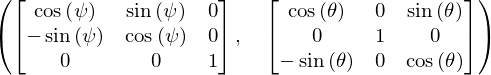

In [3]:
bCi = rotMat(3,psi) # I->B
cCb = rotMat(2,-th) # B->C
bCi,cCb

In [4]:
iWb = Matrix([0,0,psid]) #B frame
bWc = Matrix([0,-thd,0]) #C frame

### Apply Euler's second law to the disk, assuming planar moment of inertia J about $\mathbf{b}_3$ - all in $\mathcal{B}$ frame

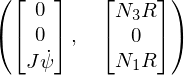

In [5]:
h_O = J*iWb; 
M_O = Matrix([0,R,0]).cross(Matrix([-N1,-N2,N3]));
h_O,M_O

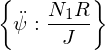

In [6]:
eom1 = solve(transportEq(h_O,t,diffdict,iWb)-M_O,psidd); eom1

### Calculate rod kinematics (of center of mass) - all in the $\mathcal{B}$ frame

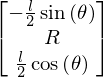

In [7]:
r_GO = Matrix([0,R,0]) + cCb.T*Matrix([0,0,l/2]); r_GO

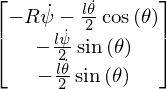

In [8]:
v_GO = transportEq(r_GO,t,diffdict,iWb)
v_GO

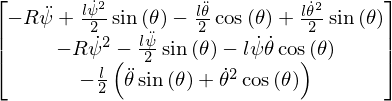

In [9]:
a_GO = transportEq(v_GO,t,diffdict,iWb);
simplify(a_GO)

### Solve for normal forces by applying Euler's first law to rod COM

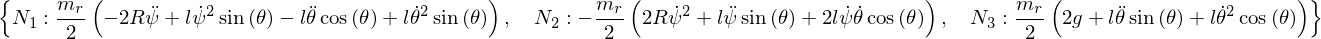

In [10]:
Ns = solve(mr*a_GO - Matrix([N1,N2,mr*g-N3]),(N1,N2,N3));Ns

### Parallel axis theorem to get MOI matrix for the rod about $Q$

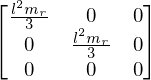

In [11]:
r_QG = Matrix([0,0,-l/2])
I_Q = mr*l**2/12*(eye(3) - diag(0,0,1)) + mr*((r_QG.transpose()*r_QG)[0]*eye(3) - r_QG*r_QG.transpose())
I_Q

### Calculate angular velocity and momentum about $Q$ in $\mathcal C$ frame components

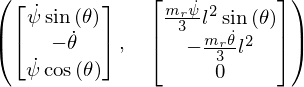

In [12]:
iWc = bWc + cCb*iWb
h_Q = I_Q*iWc
iWc,h_Q

### Now apply Euler's second law for rod about $Q$ (all in $\mathcal C$ frame)

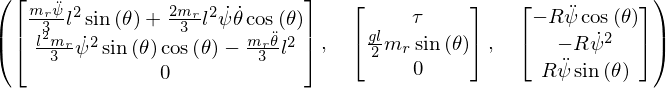

In [13]:
dh_Q = transportEq(h_Q,t,diffdict,iWc)
M_Q = Matrix([tau,mr*g*l/2*sin(th),0])
r_QO = cCb*Matrix([0,R,0])
a_QO = simplify(transportEq(transportEq(r_QO,t,diffdict,iWc),t,diffdict,iWc))
dh_Q,M_Q,a_QO

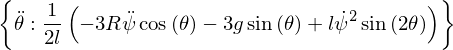

In [14]:
r_QG = Matrix([0,0,-l/2])
eom2 = solve(dh_Q - (M_Q + mr*r_QG.cross(a_QO)),thdd)
eom2

### Finally, combine the solutions to the disk and rod motions for the full equations of motion

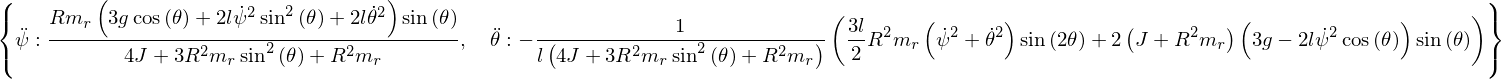

In [15]:
simplify(solve([thdd - eom2[thdd],psidd - eom1[psidd].subs(N1,Ns[N1])],(psidd,thdd)))